In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Data Import and Preparation:

1.Import data.

In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
dict_df = pd.read_excel('data_dictionary_Real_estate.xlsx')

In [3]:
traindf.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
testdf.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [5]:
print(traindf.shape)
print(testdf.shape)

(27321, 80)
(11709, 80)


In [6]:
traindf.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027488,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [8]:
traindf.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

2. Figure out the primary key and look for the requirement of indexing.

In [9]:
print(traindf.columns)
print('\n')

print(testdf.columns)

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [102]:
traindf.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
married          191
married_snp      191
separated        191
divorced         191
split              0
Length: 81, dtype: int64

In [10]:
len(set(traindf['UID']).intersection(set(testdf['UID'])))


123

123 unique in train and test

In [11]:
traindf.dtypes

UID              int64
BLOCKID        float64
SUMLEVEL         int64
COUNTYID         int64
STATEID          int64
                ...   
pct_own        float64
married        float64
married_snp    float64
separated      float64
divorced       float64
Length: 80, dtype: object

<Axes: >

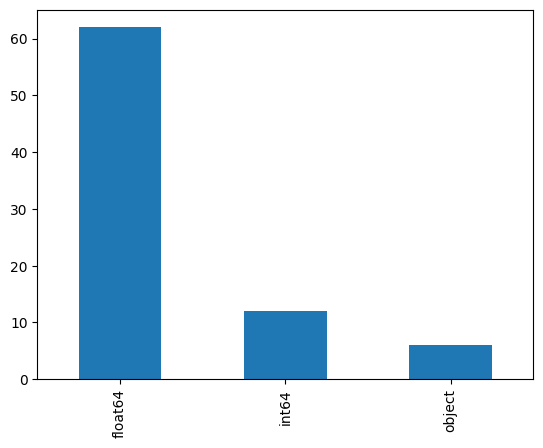

In [12]:
traindf.dtypes.value_counts().plot(kind='bar')

In [13]:
traindf.describe(include='O')

,state,state_ab,city,place,type,primary
count,27321,27321,27321,27321,27321,27321
unique,52,52,6916,9912,6,1
top,California,CA,Chicago,New York City,City,tract
freq,2926,2926,294,490,15237,27321


3.Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable

In [14]:
#This flag will help us split the data back later
traindf['split']= 'Train'
testdf['split']= 'Test'


In [15]:
df_combined=traindf.append(testdf, ignore_index=True)
df_combined.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train


In [16]:
df_combined.shape

(39030, 81)

In [17]:
df_combined.tail()


,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split
39025,238088,NaN,140,105,12,Florida,FL,Lakeland,Crystal Springs,City,...,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780,Test
39026,242811,NaN,140,31,17,Illinois,IL,Chicago,Chicago City,Village,...,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305,Test
39027,250127,NaN,140,9,25,Massachusetts,MA,Lawrence,Methuen Town City,City,...,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294,Test
39028,241096,NaN,140,27,19,Iowa,IA,Carroll,Carroll City,City,...,48.16667,24.84209,693.82905,3213.0,0.83330,0.66699,0.02738,0.00000,0.04694,Test
39029,287763,NaN,140,453,48,Texas,TX,Austin,Sunset Valley City,Town,...,35.41667,20.68049,559.30291,2047.0,0.52587,0.51922,0.08066,0.02520,0.10586,Test


In [18]:
df_combined.isna().sum()

UID                0
BLOCKID        39030
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
married          275
married_snp      275
separated        275
divorced         275
split              0
Length: 81, dtype: int64

In [19]:
# Fill rate of the variables -> (1- missing %)
1-df_combined.isna().sum()/len(df_combined)


UID            1.000000
BLOCKID        0.000000
SUMLEVEL       1.000000
COUNTYID       1.000000
STATEID        1.000000
                 ...   
married        0.992954
married_snp    0.992954
separated      0.992954
divorced       0.992954
split          1.000000
Length: 81, dtype: float64

In [20]:
# BlOCKID is completly missing or Null in both train and test data. So we will drop BLOCKID feature.
df_combined.drop(columns =['BLOCKID'], axis=1, inplace=True)

In [22]:
df_combined.isna().sum()/len(df_combined)*100

UID            0.000000
SUMLEVEL       0.000000
COUNTYID       0.000000
STATEID        0.000000
state          0.000000
                 ...   
married        0.704586
married_snp    0.704586
separated      0.704586
divorced       0.704586
split          0.000000
Length: 80, dtype: float64

In [23]:
# Missing value greater than zero
col_check=df_combined.isna().sum().to_frame().reset_index()
null_col=col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [24]:
#If the feature have less than 8 unique values then I am consdering as categorical else it will be continuous
for i in null_col:
    print(i)
    if df_combined[i].nunique()>8:      #Continuous data
        df_combined[i].fillna(df_combined[i].median(),inplace=True)    #Bcz median is not impacted by outlier
    else:df_combined[i].fillna(df_combined[i].mode()[0],inplace=True)  #Categorical data

rent_mean
rent_median
rent_stdev
rent_sample_weight
rent_samples
rent_gt_10
rent_gt_15
rent_gt_20
rent_gt_25
rent_gt_30
rent_gt_35
rent_gt_40
rent_gt_50
hi_mean
hi_median
hi_stdev
hi_sample_weight
hi_samples
family_mean
family_median
family_stdev
family_sample_weight
family_samples
hc_mortgage_mean
hc_mortgage_median
hc_mortgage_stdev
hc_mortgage_sample_weight
hc_mortgage_samples
hc_mean
hc_median
hc_stdev
hc_samples
hc_sample_weight
home_equity_second_mortgage
second_mortgage
home_equity
debt
second_mortgage_cdf
home_equity_cdf
debt_cdf
hs_degree
hs_degree_male
hs_degree_female
male_age_mean
male_age_median
male_age_stdev
male_age_sample_weight
male_age_samples
female_age_mean
female_age_median
female_age_stdev
female_age_sample_weight
female_age_samples
pct_own
married
married_snp
separated
divorced


In [25]:
df_combined.isna().sum()/len(df_combined)*100

UID            0.0
SUMLEVEL       0.0
COUNTYID       0.0
STATEID        0.0
state          0.0
              ... 
married        0.0
married_snp    0.0
separated      0.0
divorced       0.0
split          0.0
Length: 80, dtype: float64

In [26]:
df_combined.shape

(39030, 80)

In [27]:
# Drop duplicate observations
df_combined.drop_duplicates(inplace=True)
df_combined.shape

(38838, 80)

In [28]:
# As we have seen above we have 123 unique UID which are common in both train and test data. so duplicate UID removing them.
df_combined.drop_duplicates(subset=['UID'],inplace=True)
df_combined.shape

(38715, 80)

# Exploratory Data Analysis (EDA):

4.Perform debt analysis. You may take the following steps:
a. Explore the top 2,500 locations where the percentage of households with a 'second mortgage' is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [30]:
top_2500_loc=traindf[(traindf['second_mortgage']<0.50) & 
                      (traindf['pct_own']>0.10) ].sort_values(by='second_mortgage', ascending=False).head(2500)


In [31]:
top_2500_loc=top_2500_loc[['state','city','state_ab','place','lat','lng']]
top_2500_loc.head()

,state,city,state_ab,place,lat,lng
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434


In [32]:
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 21.9/21.9 MB 1.2 MB/s eta 0:00:00


In [33]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(top_2500_loc, geometry=gpd.points_from_xy(x=top_2500_loc.lng, y=top_2500_loc.lat))
gdf

,state,city,state_ab,place,lat,lng,geometry
11980,Massachusetts,Worcester,MA,Worcester City,42.254262,-71.800347,POINT (-71.80035 42.25426)
26018,New York,Corona,NY,Harbor Hills,40.751809,-73.853582,POINT (-73.85358 40.75181)
7829,Maryland,Glen Burnie,MD,Glen Burnie,39.127273,-76.635265,POINT (-76.63526 39.12727)
2077,Florida,Tampa,FL,Egypt Lake-leto,28.029063,-82.495395,POINT (-82.49540 28.02906)
1701,Illinois,Chicago,IL,Lincolnwood,41.967289,-87.652434,POINT (-87.65243 41.96729)
...,...,...,...,...,...,...,...
17914,North Carolina,Raleigh,NC,Raleigh City,35.757135,-78.704288,POINT (-78.70429 35.75713)
5478,California,Marina Del Rey,CA,Marina Del Rey,33.983204,-118.466139,POINT (-118.46614 33.98320)
25642,Maryland,Baltimore,MD,Lochearn,39.353095,-76.733315,POINT (-76.73331 39.35310)
26671,Pennsylvania,Philadelphia,PA,Philadelphia City,40.039070,-75.125135,POINT (-75.12514 40.03907)


b. Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [34]:
#Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
df_combined['bad_debt'] = df_combined['second_mortgage'] + df_combined['home_equity'] - df_combined['home_equity_second_mortgage']
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426


In [113]:
size = 10
explode = [0.4] * size
explode = tuple(explode)
explode

explode_bd = [0.5] * size*2
explode_bd = tuple(explode_bd)
explode_bd

labels_D = ['GD', 'BD'] * size
labels_D = tuple(labels_D)
labels_D

('GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD',
 'GD',
 'BD')

In [117]:
l1 = list(df_combined['bad_debt'] )
l1[:5]

[0.09408, 0.04274, 0.09512, 0.01086, 0.05426]

In [119]:
l2 = list(df_combined['good_debt'] )
l2[:5]

[0.43555000000000005, 0.56581, 0.6397200000000001, 0.5162800000000001, 0.46512]

In [120]:
l3 = sum(zip(l1, l2+[0]), ())

In [121]:
l3[:10]

(0.09408,
 0.43555000000000005,
 0.04274,
 0.56581,
 0.09512,
 0.6397200000000001,
 0.01086,
 0.5162800000000001,
 0.05426,
 0.46512)

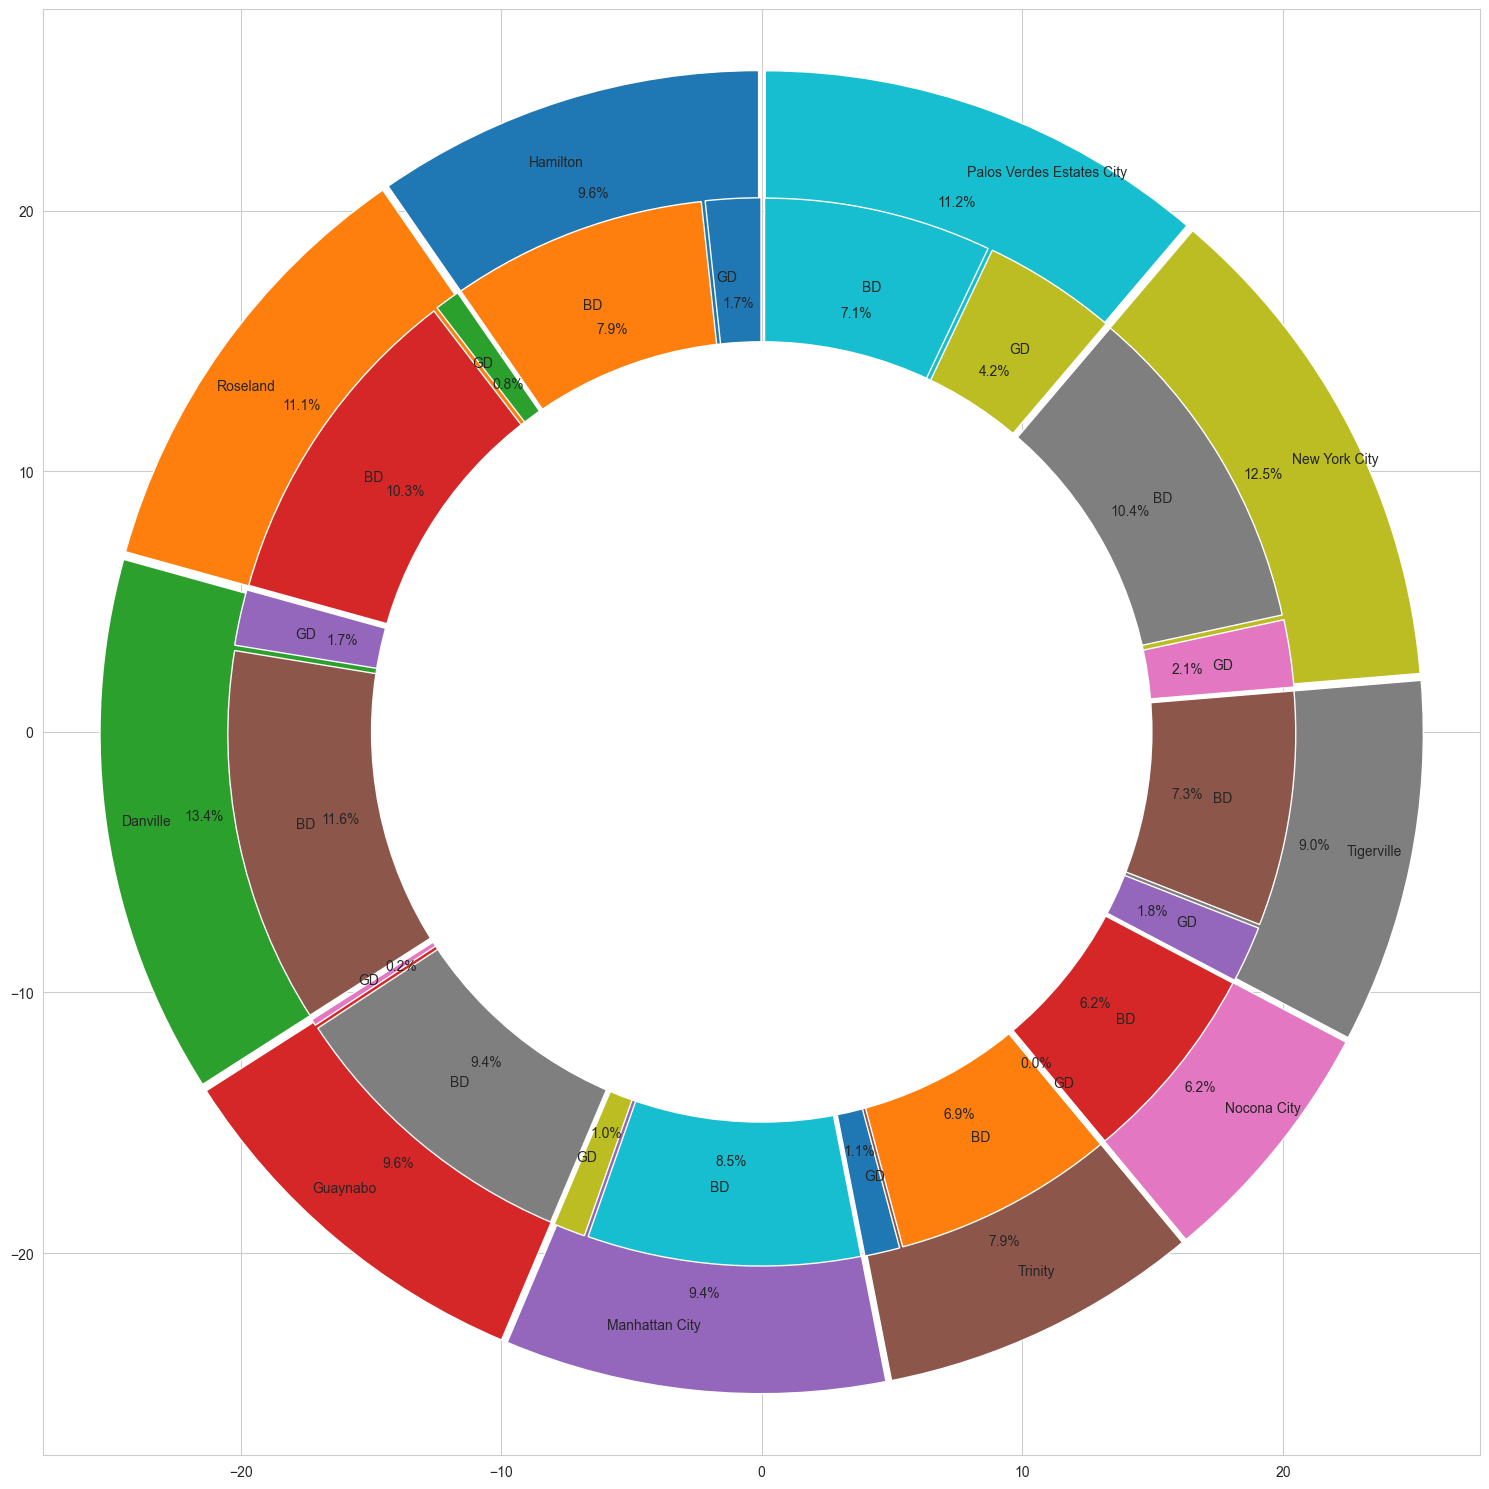

In [122]:
labels = list(df_combined.place[:10])
debt = list(df_combined.debt[:10])

sns.set_style("whitegrid")

gd_bd = l3[:20]

plt.figure(figsize = (15, 15))

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
#color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

plt.pie(debt, labels = labels, startangle = 90, frame = True, radius =25, autopct='%1.1f%%', pctdistance=0.85, labeldistance = 0.9, colors = color_pal, explode = explode)
plt.pie(gd_bd, labels = labels_D, startangle = 90, frame = True, radius = 20, autopct='%1.1f%%', pctdistance=0.80,  labeldistance = 0.85, colors = color_pal, explode = explode_bd)
centre_circle = plt.Circle((0,0),15,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

c. Create pie charts to show overall debt and bad debt       


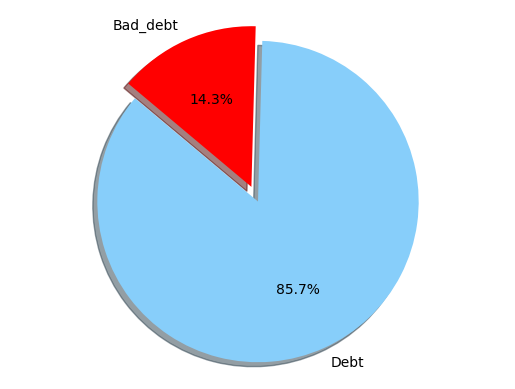

In [35]:
import matplotlib.pyplot as plt
labels = 'Debt', 'Bad_debt'
sizes = [df_combined['debt'].mean()*100, df_combined['bad_debt'].mean()*100]
colors = [ 'lightskyblue','red']
explode = (0.1, 0)  # explode 1st slice

#Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

d. Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities


In [36]:
df_combined['good_debt']=df_combined['debt']-df_combined['bad_debt']
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512


In [37]:
df_combined.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

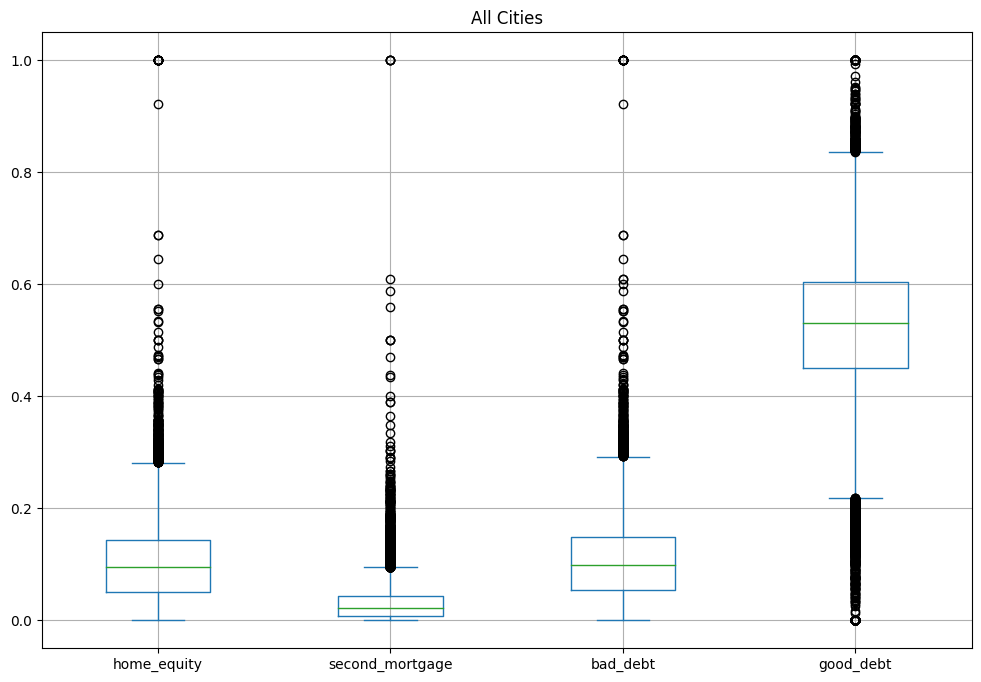

In [38]:
all_cities = df_combined[['home_equity','second_mortgage','bad_debt', 'good_debt']]
all_cities.plot.box(figsize=(12,8),grid=True)
plt.title('All Cities')
plt.show()

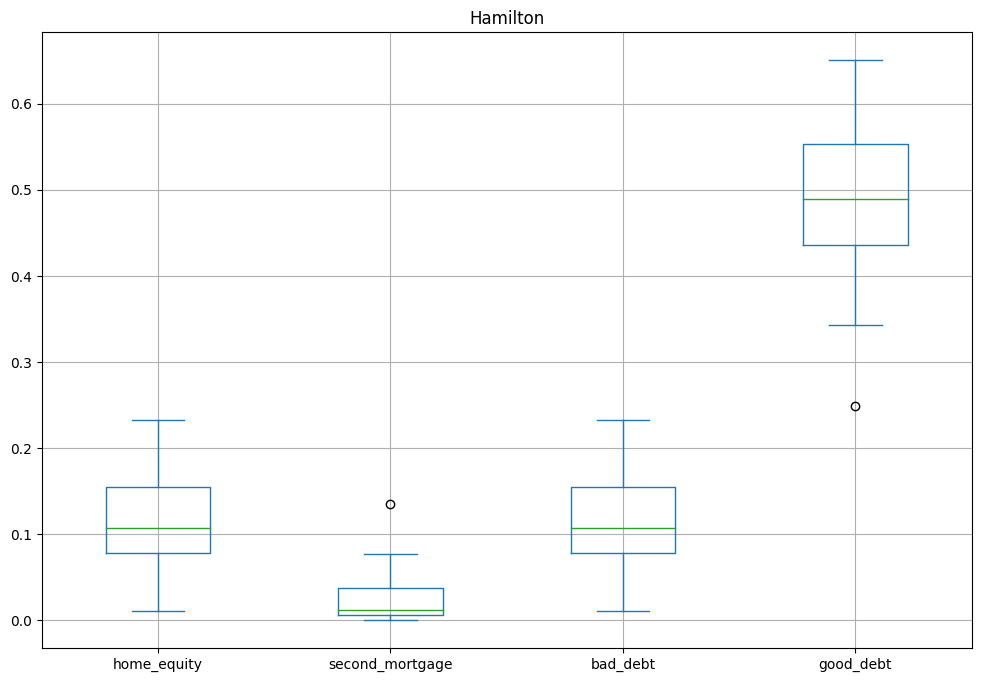

In [39]:
hamilton = df_combined[df_combined['city']=='Hamilton']
hamilton = hamilton[['home_equity','second_mortgage','bad_debt', 'good_debt']]
hamilton.plot.box(figsize=(12,8),grid=True)
plt.title('Hamilton')
plt.show()

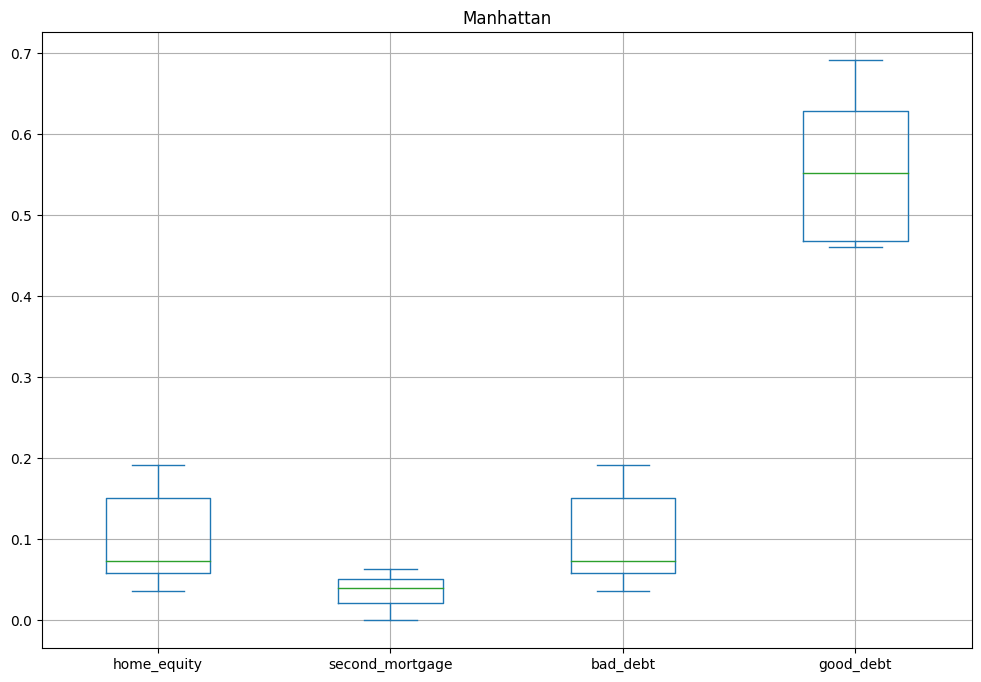

In [40]:
Manhattan = df_combined[df_combined['city']=='Manhattan']
Manhattan = Manhattan[['home_equity','second_mortgage','bad_debt', 'good_debt']]
Manhattan.plot.box(figsize=(12,8),grid=True)
plt.title('Manhattan')
plt.show()

In [125]:
cities = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']

In [126]:
boxplot_df = df_combined[df_combined['city'].isin (cities)]

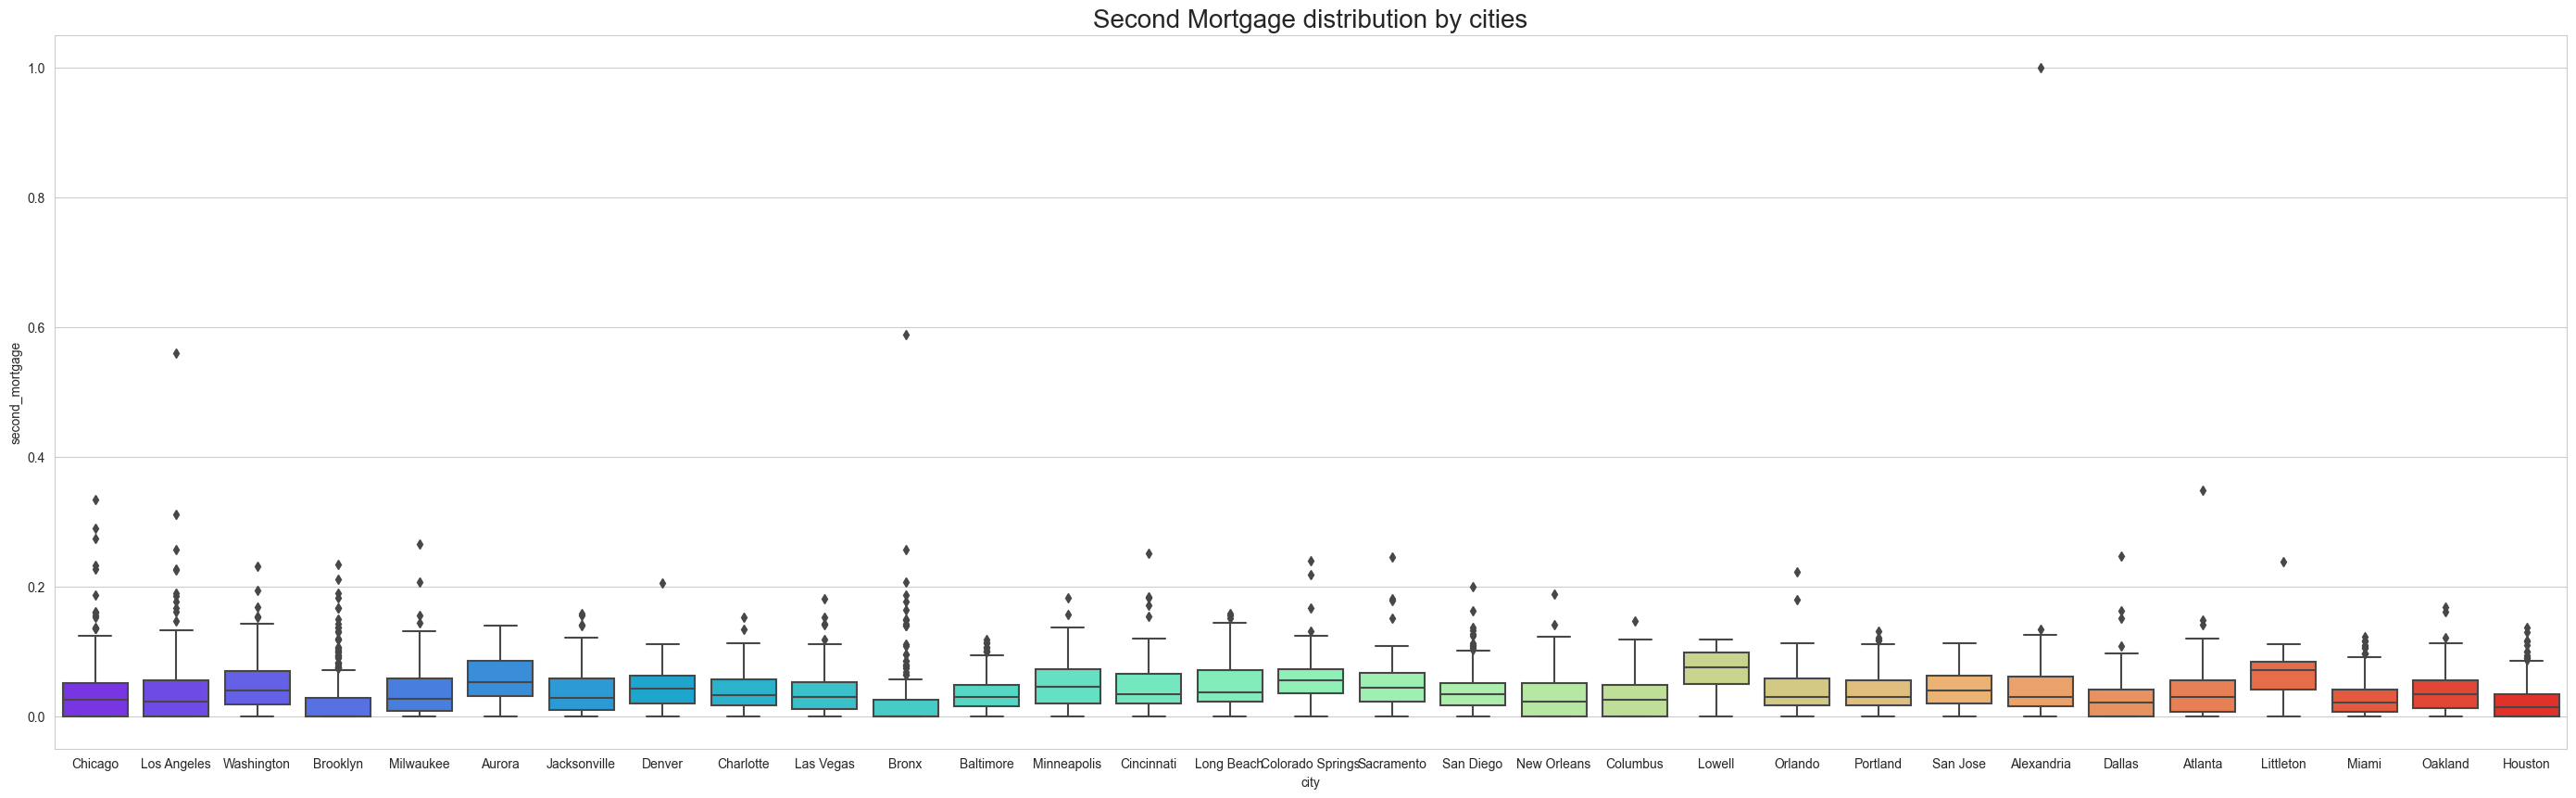

In [127]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()

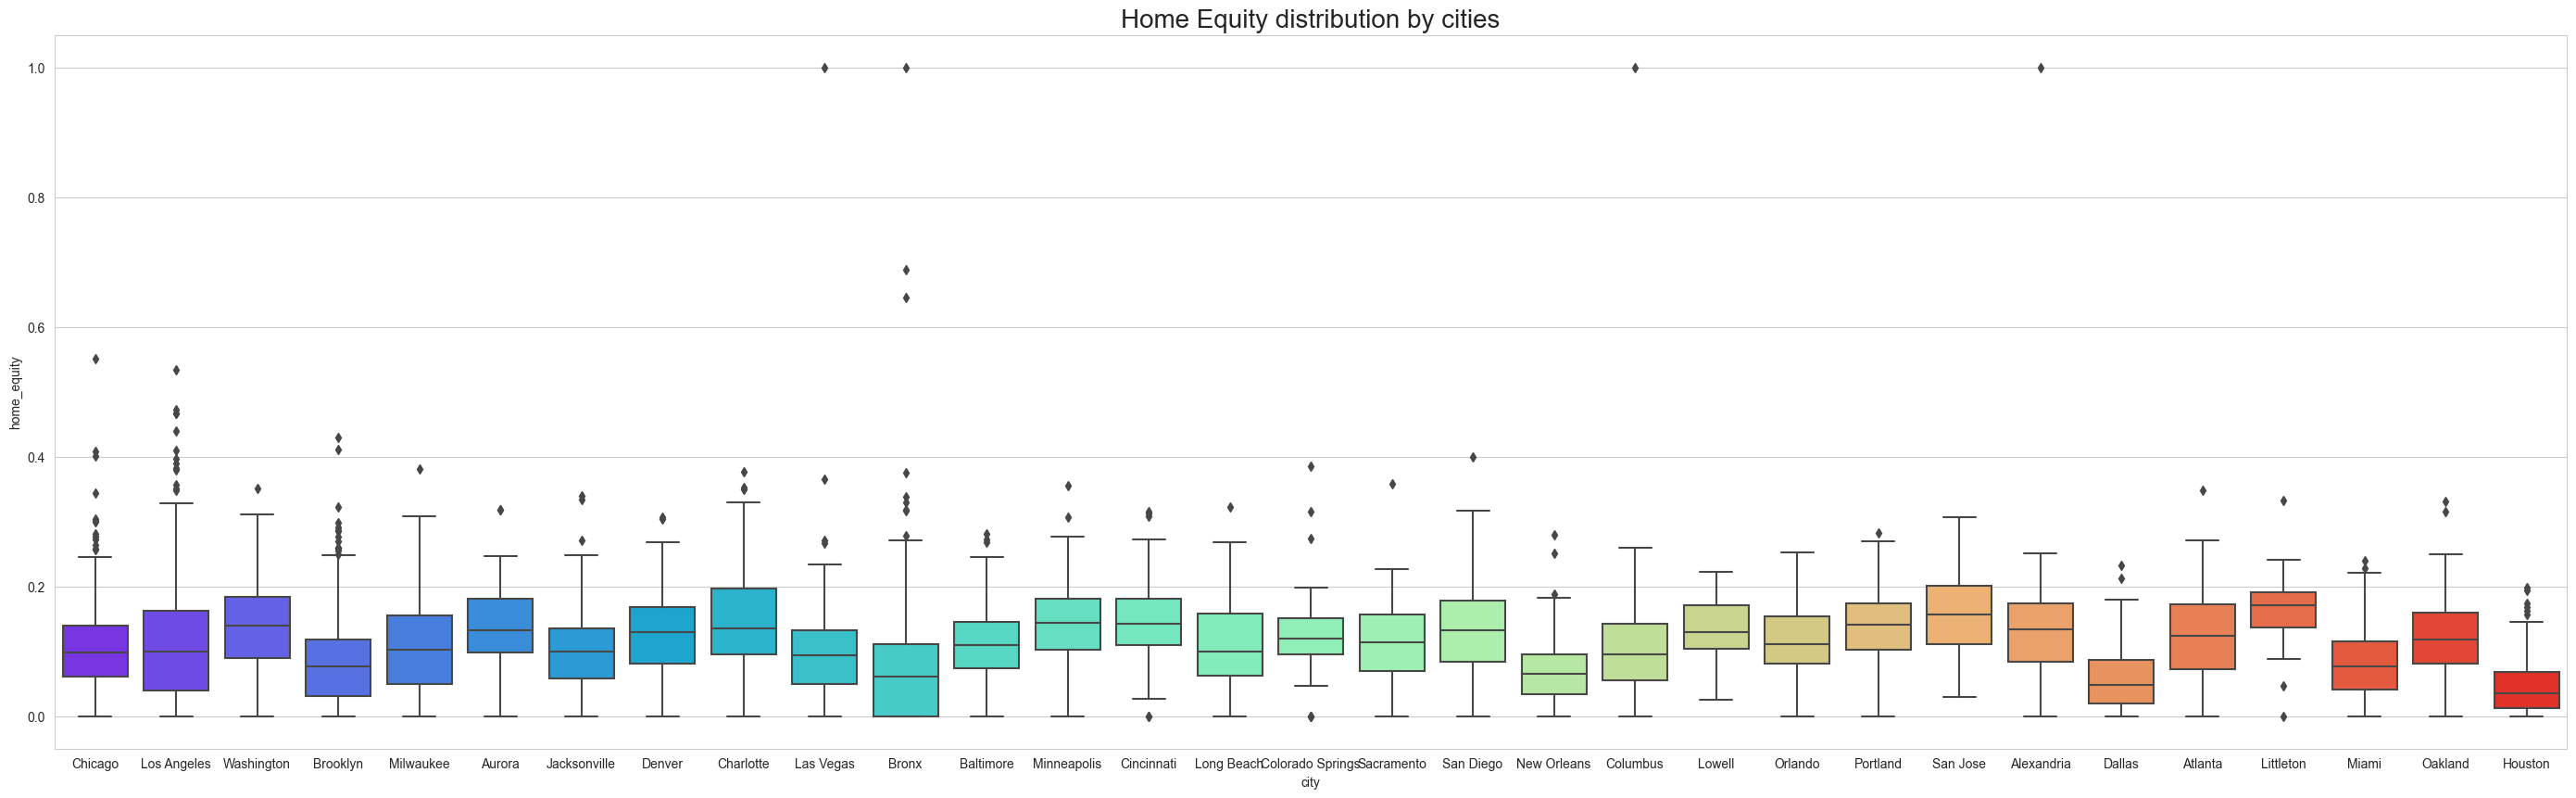

In [128]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='home_equity',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Home Equity distribution by cities', fontsize = 20)
plt.show()

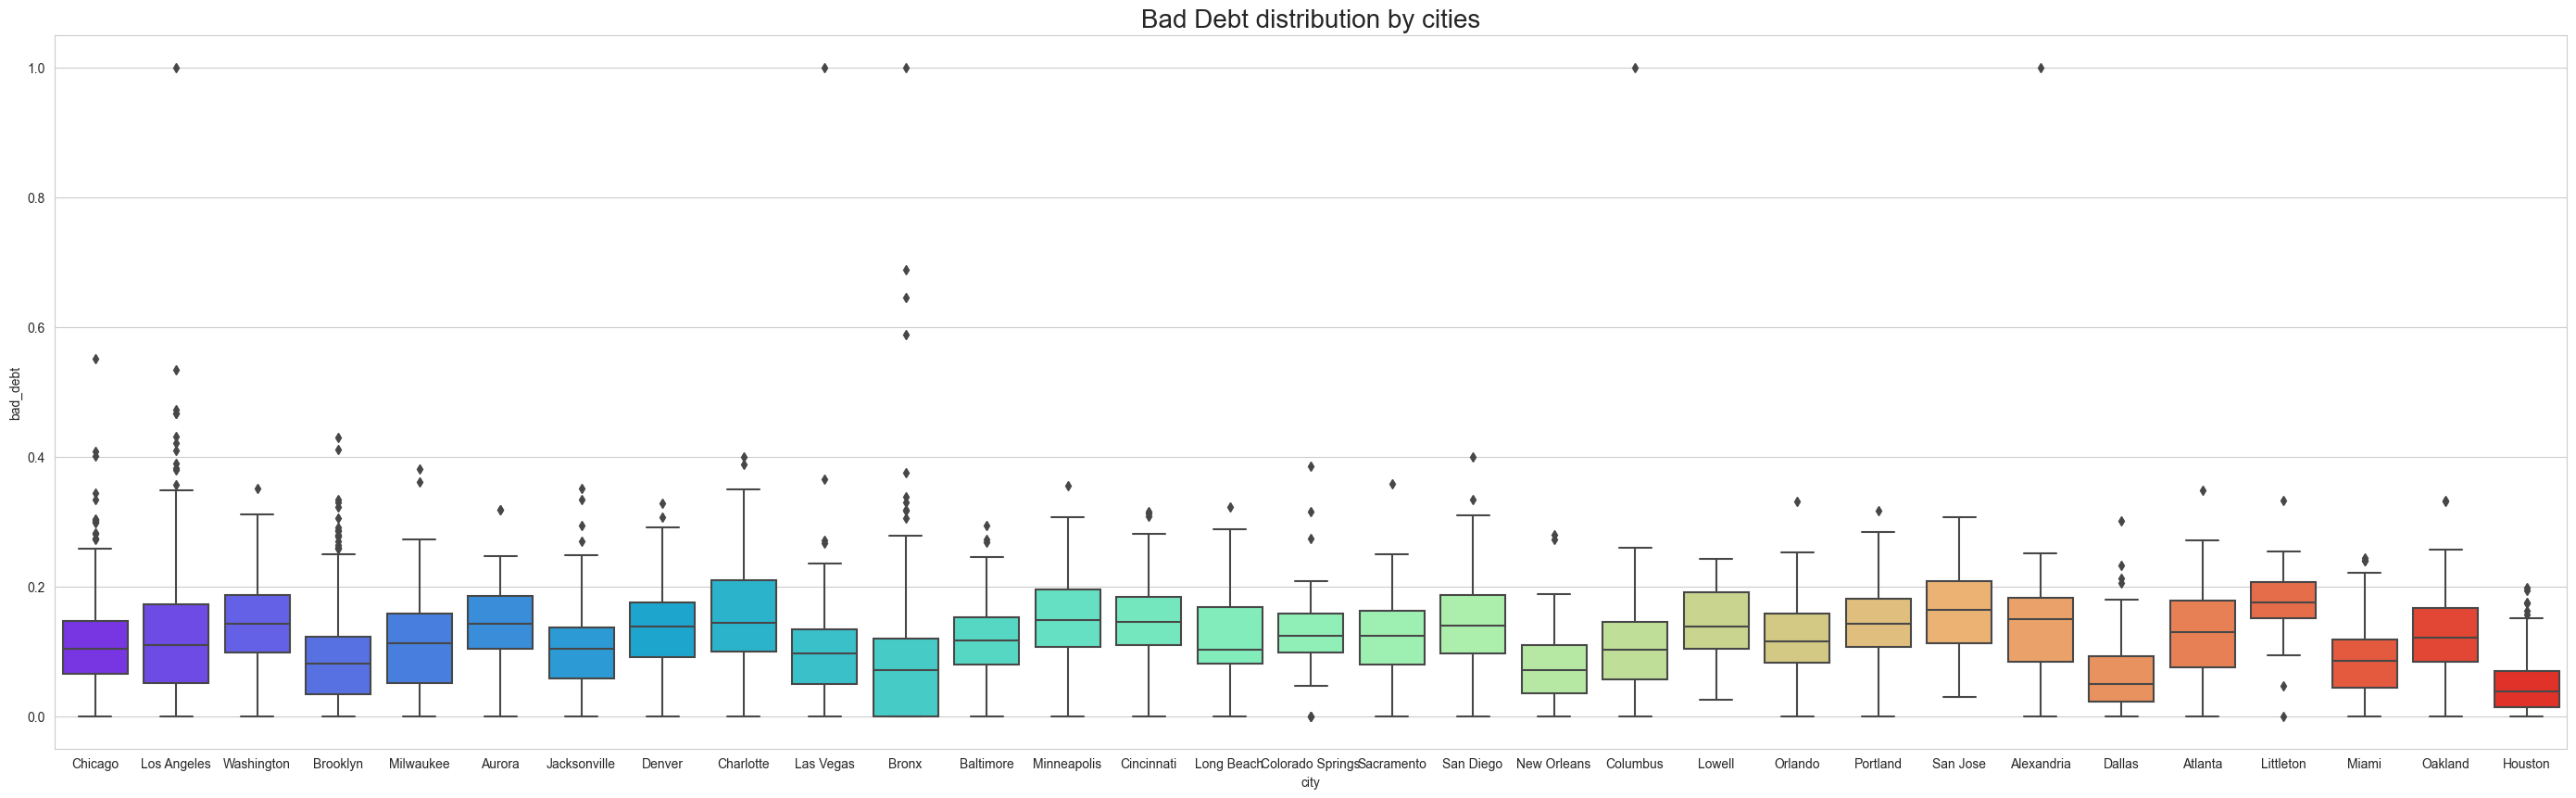

In [130]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='bad_debt',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Bad Debt distribution by cities', fontsize = 20)
plt.show()

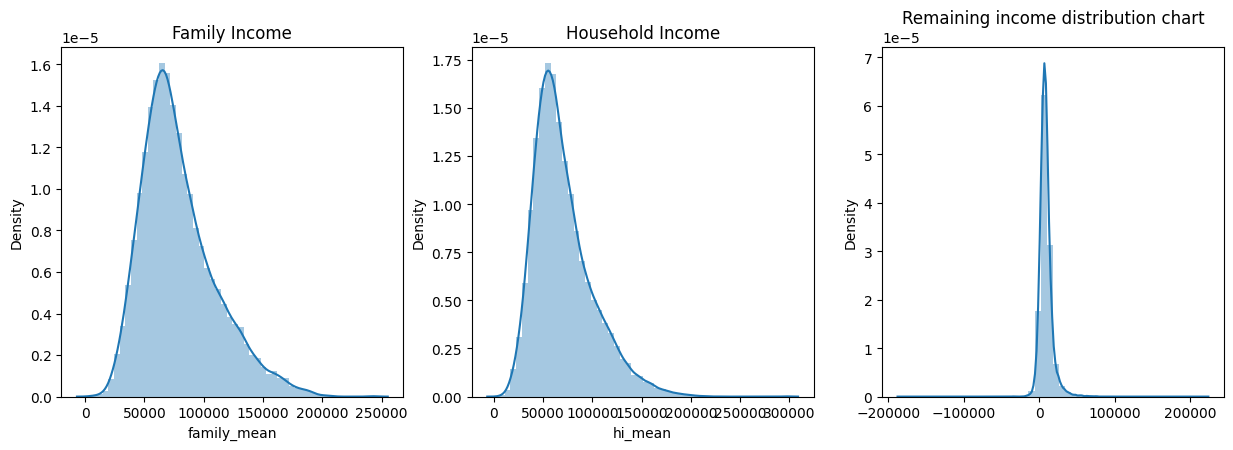

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(traindf['family_mean'])
plt.title('Family Income')
plt.subplot(2,3,2)
sns.distplot(traindf['hi_mean'])
plt.title('Household Income')
plt.subplot(2,3,3)
sns.distplot(traindf['family_mean']-traindf['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

# Project Task: Week 2 Exploratory Data Analysis (EDA):

   Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):
    a. Use pop and ALand variables to create a new field called population density

In [44]:
df_combined['population_density'] = df_combined['pop']/df_combined['ALand']
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_samples,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207


In [45]:
# Weighted average
# median_age=((male_age_median * male_pop)+(female_age_median*female_pop))/(male_pop+female_pop)
#           =((40*10)+(50*30))/40
#           =(400+1500)/40
#           =190/4
#           =47.5
df_combined['median_age']=((df_combined['male_age_median'] * df_combined['male_pop'])+(df_combined['female_age_median']*df_combined['female_pop']))/(df_combined['male_pop']+df_combined['female_pop'])
df_combined.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,pct_own,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,0.79046,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026,44.667430
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,0.52483,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687,34.722748
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,0.85331,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099,41.774472
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,0.65037,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442,49.879012
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,0.13046,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207,21.965629


c. Visualize the findings using appropriate chart type


<Axes: xlabel='population_density', ylabel='Count'>

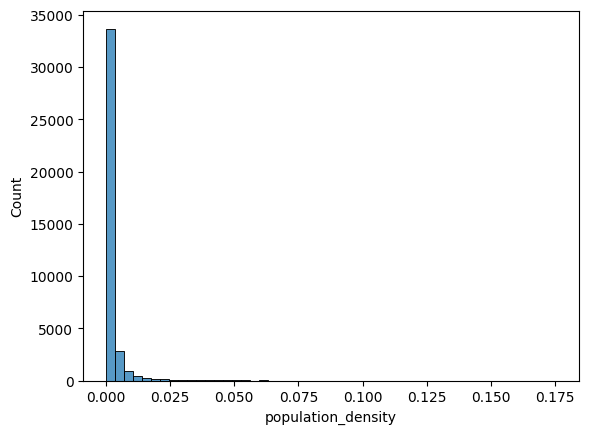

In [46]:
sns.histplot(df_combined['population_density'], bins=50)

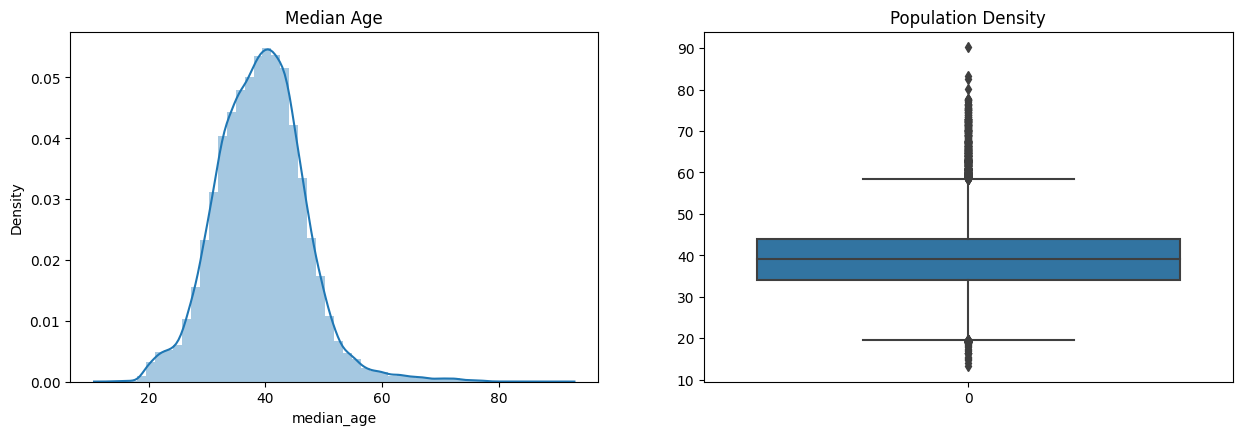

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df_combined['median_age'])
plt.title('Median Age')
plt.subplot(2,2,2)
sns.boxplot(df_combined['median_age'])
plt.title('Population Density')
plt.show()

Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.


In [48]:
df_combined['pop_bins']=pd.cut(df_combined['pop'],bins=5,labels=['very low','low','medium','high','very high'])
df_combined['pop_bins'].value_counts()

very low     38350
low            348
medium          12
high             4
very high        1
Name: pop_bins, dtype: int64

a. Analyze the married, separated, and divorced population for these population brackets 


In [49]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,38350,38350,38350
low,348,348,348
medium,12,12,12
high,4,4,4
very high,1,1,1


In [50]:
df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])


married           separated            divorced         
               mean    median      mean    median      mean   median
pop_bins                                                            
very low   0.508000  0.526210  0.019127  0.013580  0.100325  0.09510
low        0.589247  0.601815  0.014929  0.010255  0.075192  0.06934
medium     0.617047  0.605765  0.011203  0.007745  0.071870  0.06909
high       0.629132  0.675095  0.012372  0.007340  0.060562  0.05987
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.03036

b. Visualize using appropriate chart type


<Figure size 1200x800 with 0 Axes>

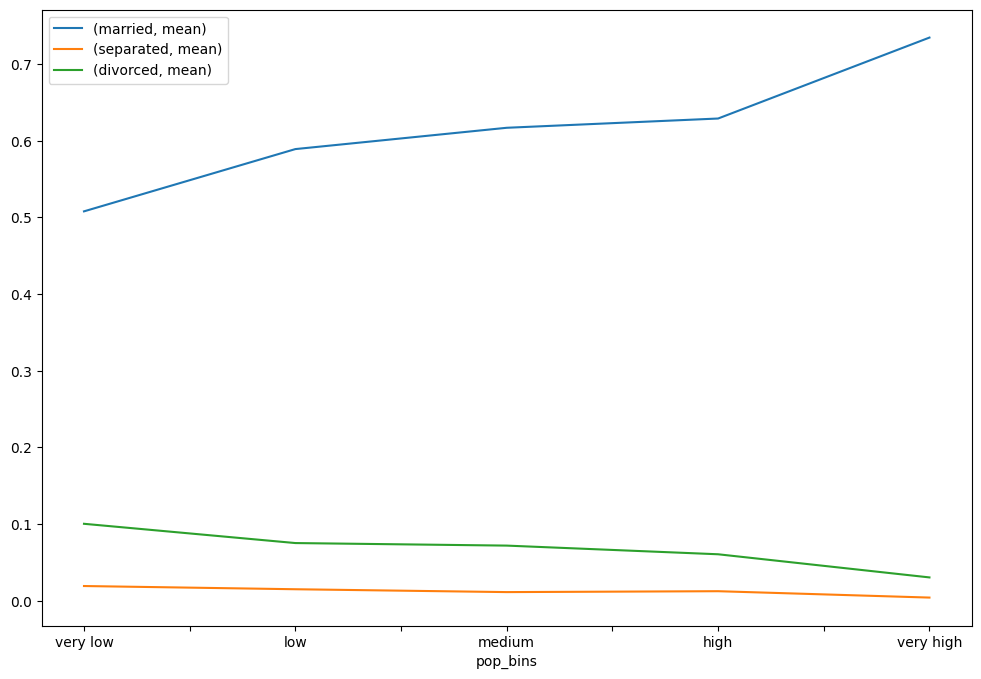

In [51]:
plt.figure(figsize=(12,8))
pop_bin_married=df_combined.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(12,8))
plt.legend(loc='best')
plt.show()

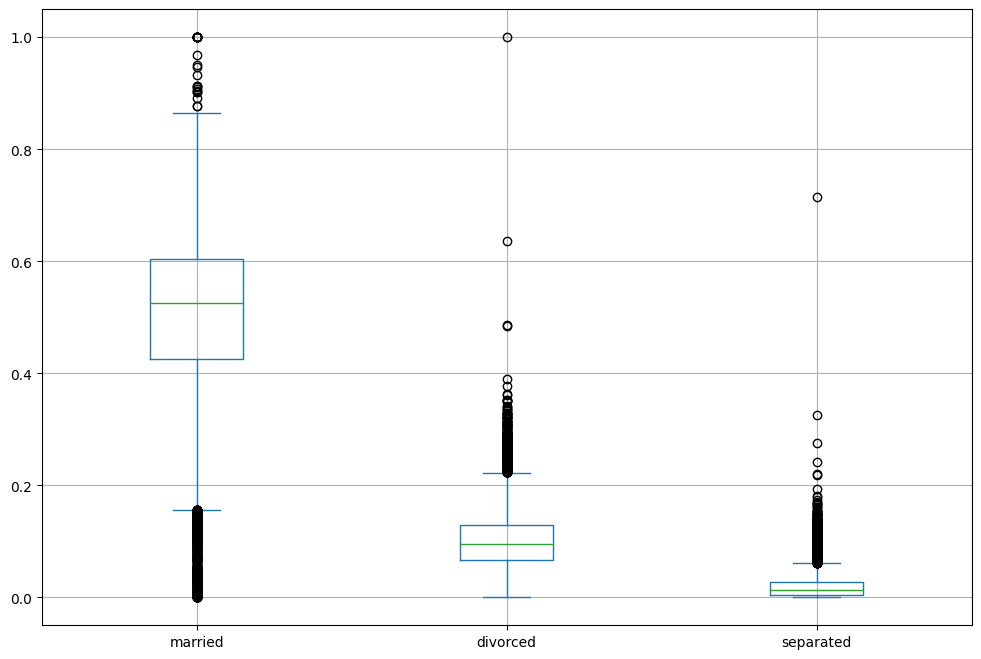

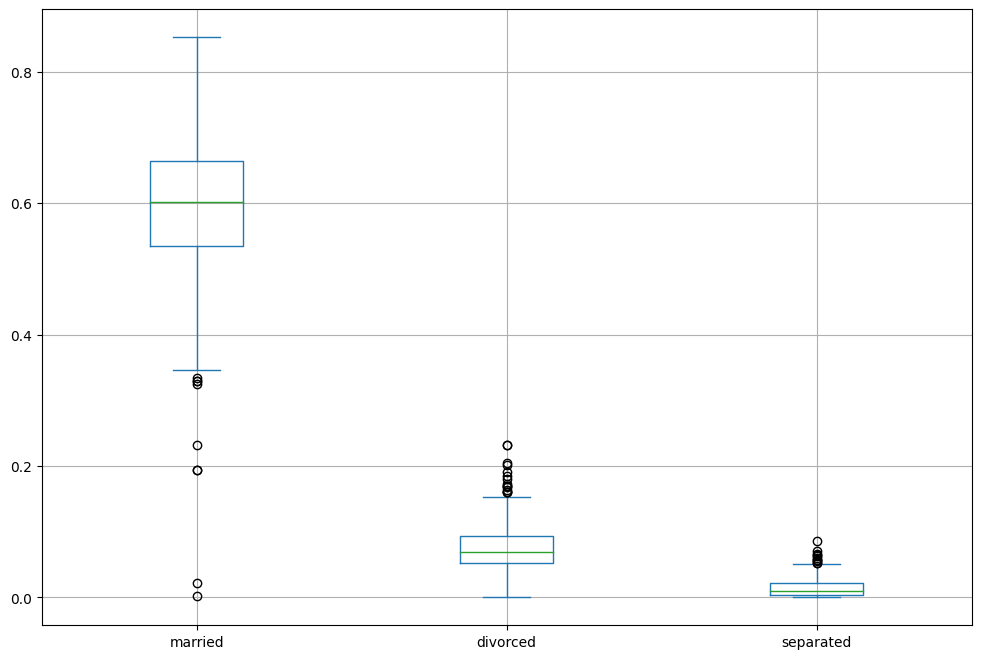

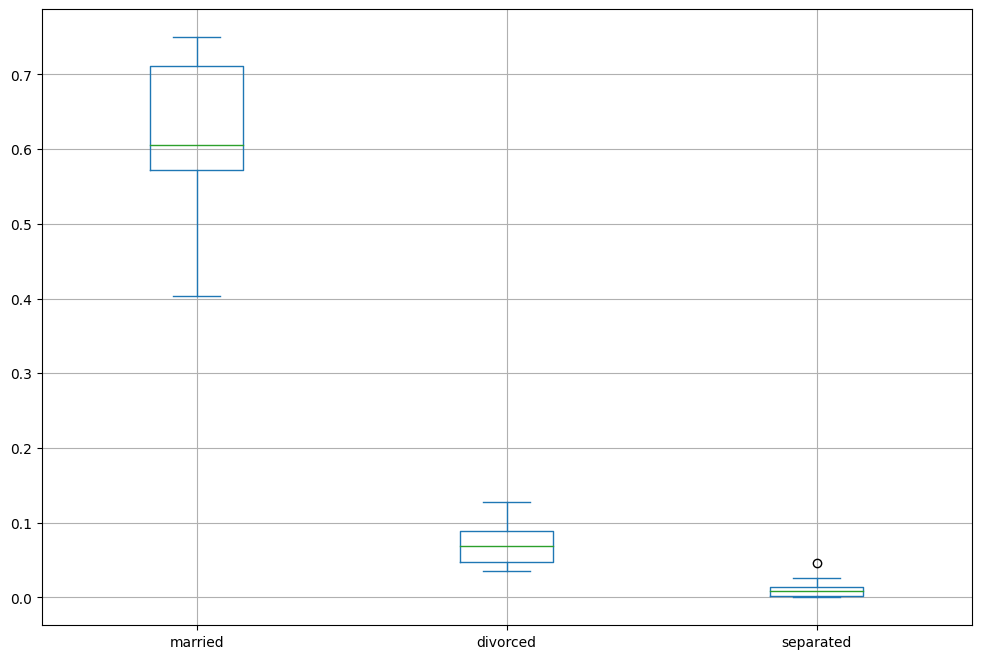

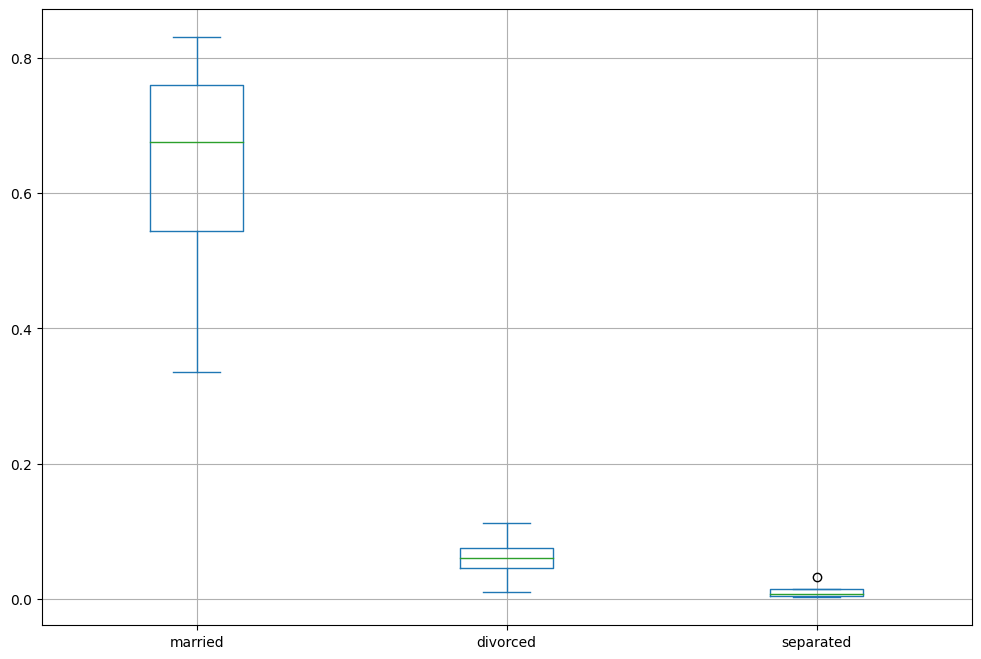

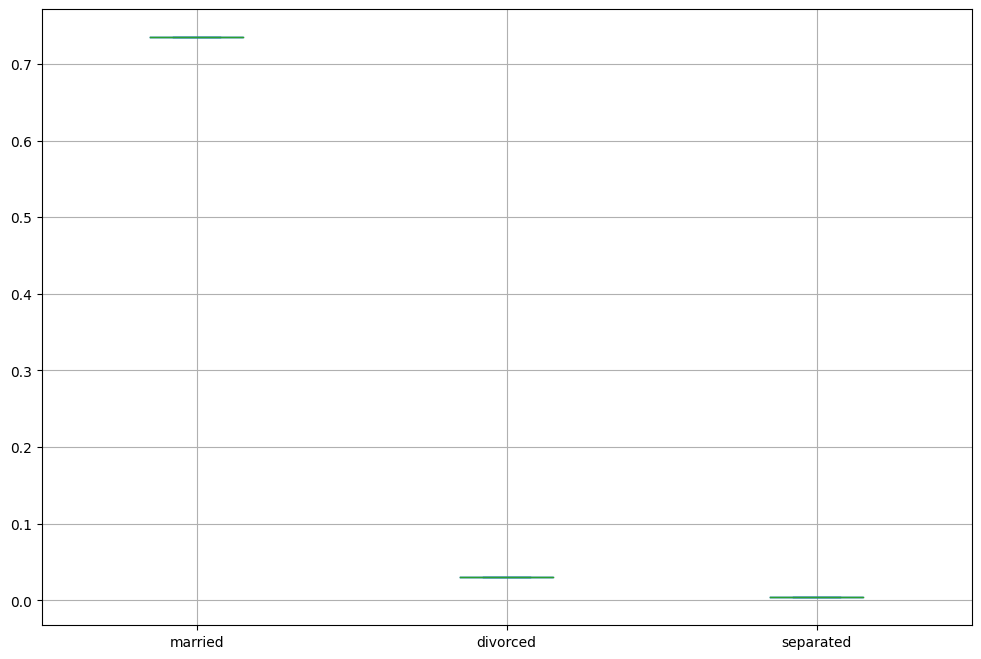

In [52]:
df_combined.groupby(by='pop_bins')[['married','divorced', 'separated']].plot.box(figsize=(12,8),grid='True')
plt.show()


Please detail your observations for rent as a percentage of income at an overall level, and for different states.


In [53]:
rent_state_mean = df_combined.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,765.872557
Alaska,1190.093590
Arizona,1084.510940
Arkansas,716.544987
California,1466.020465


In [54]:
income_state_mean=df_combined.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,65311.510962
Alaska,91911.137520
Arizona,73014.068487
Arkansas,64234.705963
California,87711.550734


In [55]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']*100
rent_perc_of_income.head(10)

state
Alabama                 1.172646
Alaska                  1.294831
Arizona                 1.485345
Arkansas                1.115511
California              1.671411
Colorado                1.359697
Connecticut             1.272141
Delaware                1.311538
District of Columbia    1.357450
Florida                 1.576101
Name: mean, dtype: float64

In [56]:
sum(df_combined['rent_mean'])/sum(df_combined['family_mean'])

0.013351543786573208

Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.


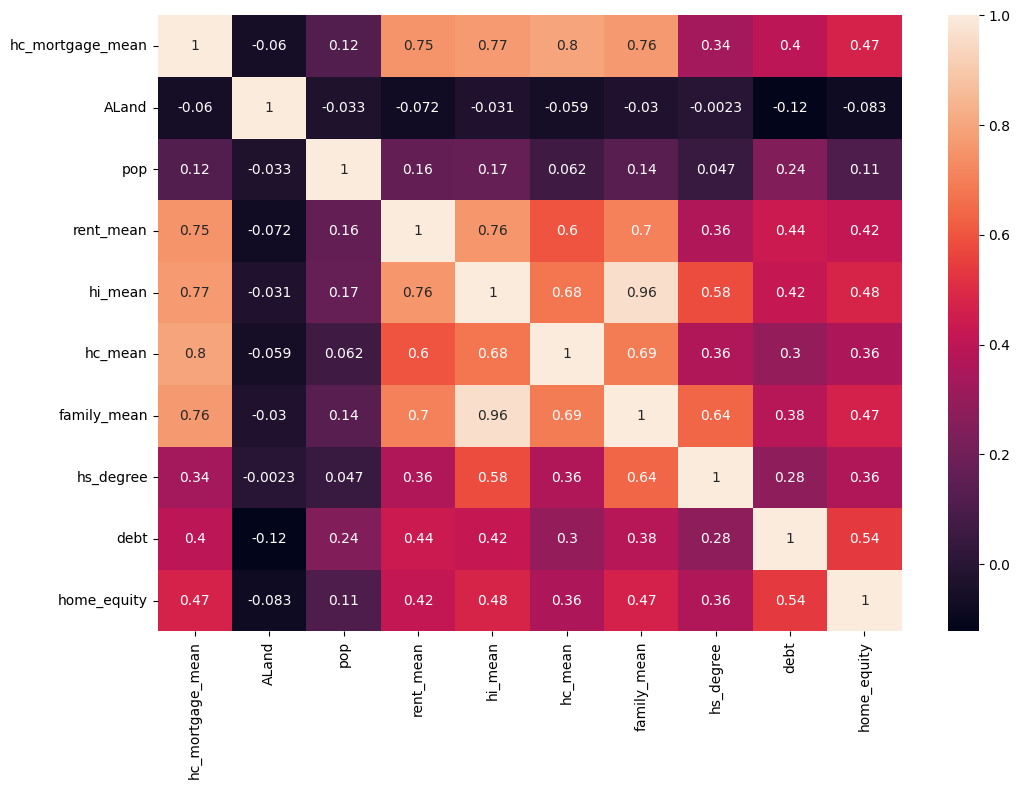

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_combined[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True)
plt.show()

rent_mean, hi_mean, hc_mean, family_mean has a good correlation with the target i.e-hc_mortagage_mean


In [60]:
train = df_combined[df_combined['split'] == 'Train']
test = df_combined[df_combined['split'] == 'Test']
train.head()


,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age,pop_bins
0,267822,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,0.57851,0.01882,0.01240,0.08770,Train,0.09408,0.43555,0.000026,44.667430,very low
1,246444,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,0.34886,0.01426,0.01426,0.09030,Train,0.04274,0.56581,0.001687,34.722748,very low
2,245683,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,0.64745,0.02830,0.01607,0.10657,Train,0.09512,0.63972,0.000099,41.774472,very low
3,279653,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,0.47257,0.02021,0.02021,0.10106,Train,0.01086,0.51628,0.002442,49.879012,very low
4,247218,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,0.12356,0.00000,0.00000,0.03109,Train,0.05426,0.46512,0.002207,21.965629,very low


In [61]:
test.head()

,UID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,married,married_snp,separated,divorced,split,bad_debt,good_debt,population_density,median_age,pop_bins
27321,255504,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,0.28217,0.05910,0.03813,0.14299,Test,0.07651,0.55973,0.001260,31.189053,very low
27322,252676,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,0.64221,0.02338,0.00000,0.13377,Test,0.14375,0.50380,0.000257,46.382991,very low
27323,276314,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,0.59961,0.01746,0.01358,0.10026,Test,0.06744,0.38651,0.000015,43.147420,very low
27324,248614,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,0.56953,0.05492,0.04694,0.12489,Test,0.01741,0.40174,0.000005,45.155104,very low
27325,286865,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,0.57620,0.01726,0.00588,0.16379,Test,0.03440,0.59748,0.000452,43.235983,very low


# Project Task: Week 3
## Data Pre-processing:

The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables.
Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. Following are the list of latent variables:
Highschool graduation rates
Median population age
Second mortgage statistics
Percent own
Bad debt expense

In [62]:
!pip install factor_analyzer


     -------------------------------------- 41.8/41.8 kB 404.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 202.7/202.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 98.8/98.8 kB 1.1 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42071 sha256=6b04b7b4f0804bc8775440cf1397aa20bff3a9e91e72ccb0b25bee917277438a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\67\5d\7e\060233fe75180ddda5413cf4e9991c91417a62e609d3f75028
Successfully built factor_analyzer


In [65]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [75]:
traindf.describe().T


,count,mean,std,min,25%,50%,75%,max
UID,27321.0,257331.996303,21343.859725,220342.0,238816.000000,257220.000000,275818.000000,294334.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,27321.0,140.000000,0.000000,140.0,140.000000,140.000000,140.000000,140.00000
COUNTYID,27321.0,85.646426,98.333097,1.0,29.000000,63.000000,109.000000,840.00000
STATEID,27321.0,28.271806,16.392846,1.0,13.000000,28.000000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,27053.0,0.640434,0.226640,0.0,0.502780,0.690840,0.817460,1.00000
married,27130.0,0.508300,0.136860,0.0,0.425102,0.526665,0.605760,1.00000
married_snp,27130.0,0.047537,0.037640,0.0,0.020810,0.038840,0.065100,0.71429
separated,27130.0,0.019089,0.020796,0.0,0.004530,0.013460,0.027488,0.71429


In [132]:
traindf['bad_debt'] = traindf['second_mortgage'] + traindf['home_equity'] - traindf['home_equity_second_mortgage']

In [104]:
# BlOCKID is completly missing or Null in both train and test data. So we will drop BLOCKID feature.
traindf.drop(columns =['BLOCKID'], axis=1, inplace=True)

In [133]:
for col in traindf.columns:
    print(col,' = ' ,traindf[col].dtype)

UID  =  int64
SUMLEVEL  =  int64
COUNTYID  =  int64
STATEID  =  int64
state  =  object
state_ab  =  object
city  =  object
place  =  object
type  =  object
primary  =  object
zip_code  =  int64
area_code  =  int64
lat  =  float64
lng  =  float64
ALand  =  float64
AWater  =  int64
pop  =  int64
male_pop  =  int64
female_pop  =  int64
rent_mean  =  float64
rent_median  =  float64
rent_stdev  =  float64
rent_sample_weight  =  float64
rent_samples  =  float64
rent_gt_10  =  float64
rent_gt_15  =  float64
rent_gt_20  =  float64
rent_gt_25  =  float64
rent_gt_30  =  float64
rent_gt_35  =  float64
rent_gt_40  =  float64
rent_gt_50  =  float64
universe_samples  =  int64
used_samples  =  int64
hi_mean  =  float64
hi_median  =  float64
hi_stdev  =  float64
hi_sample_weight  =  float64
hi_samples  =  float64
family_mean  =  float64
family_median  =  float64
family_stdev  =  float64
family_sample_weight  =  float64
family_samples  =  float64
hc_mortgage_mean  =  float64
hc_mortgage_median  =  floa

In [134]:
def cat_variables(df):
    cat_variables = list(df.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [135]:
def num_variables(df):
    num_variables = list(df.select_dtypes(include = ['int', 'float']).columns)
    return num_variables

In [136]:
traindf.city.dtype

dtype('O')

In [137]:
cat_variables(traindf)

['state', 'state_ab', 'city', 'place', 'type', 'primary', 'split']

In [112]:
traindf.dtypes

UID              int64
SUMLEVEL         int64
COUNTYID         int64
STATEID          int64
state           object
                ...   
married        float64
married_snp    float64
separated      float64
divorced       float64
split           object
Length: 80, dtype: object

In [138]:
num_variables(traindf)

['UID',
 'SUMLEVEL',
 'COUNTYID',
 'STATEID',
 'zip_code',
 'area_code',
 'lat',
 'lng',
 'ALand',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'universe_samples',
 'used_samples',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 

In [139]:
fa_train_df = traindf[num_variables(traindf)]
fa_train_df

,UID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
0,267822,140,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
1,246444,140,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,...,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274
2,245683,140,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,...,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512
3,279653,140,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,...,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086
4,247218,140,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,...,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,279212,140,43,72,769,787,18.076060,-66.358379,6.970300e+05,0,...,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683,0.00000
27317,277856,140,91,42,19422,215,40.158138,-75.307271,5.077337e+06,11786,...,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888,0.20908
27318,233000,140,87,8,80653,970,40.410316,-103.814003,1.323262e+09,17577610,...,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712,0.07857
27319,287425,140,439,48,76034,817,32.904866,-97.162151,1.865230e+07,158882,...,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261,0.14305


In [140]:
# exclude columns you don't want
fa_train_df = fa_train_df[fa_train_df.columns[~fa_train_df.columns.isin(['SUMLEVEL', 'lat', 'lng', 
                                                                                                            'ALand', # 'AWater'
                                                                                                        ])]]

In [141]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( rotation=None, n_factors = 25)
fa.fit(fa_train_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 1.54310127e+01,  1.19069846e+01,  8.14686828e+00,  4.59868334e+00,
        3.94013823e+00,  3.06379802e+00,  2.29954172e+00,  2.04820934e+00,
        1.45275990e+00,  1.33777633e+00,  1.21959439e+00,  1.14398383e+00,
        1.01672148e+00,  9.66790229e-01,  8.98942074e-01,  8.54680976e-01,
        8.36015356e-01,  7.35843693e-01,  7.33534583e-01,  5.76538227e-01,
        5.59259297e-01,  5.43259103e-01,  5.08030229e-01,  4.42404056e-01,
        3.89280062e-01,  3.67938043e-01,  3.32950295e-01,  3.22822035e-01,
        3.04534539e-01,  2.68378554e-01,  2.55930458e-01,  2.48027140e-01,
        2.02603000e-01,  1.99263722e-01,  1.87676423e-01,  1.70426976e-01,
        1.67133861e-01,  1.41091442e-01,  1.31399865e-01,  1.26856907e-01,
        1.14779872e-01,  9.95684471e-02,  9.18453679e-02,  8.95534296e-02,
        6.82759507e-02,  5.75201172e-02,  5.61226550e-02,  4.79309728e-02,
        4.70911708e-02,  3.42174857e-02,  3.06587755e-02,  2.48219964e-02,
        2.08642465e-02,  

In [142]:
print(sorted(ev, reverse=True))

[15.431012660889145, 11.906984622747983, 8.14686827676219, 4.598683340391083, 3.94013822548248, 3.0637980154298683, 2.2995417199225003, 2.048209343157635, 1.452759896964583, 1.337776326373825, 1.2195943913135183, 1.1439838266389615, 1.0167214765660841, 0.9667902290026146, 0.8989420740255204, 0.8546809761029114, 0.836015356454318, 0.7358436930370085, 0.733534582839224, 0.576538227486345, 0.5592592974012773, 0.5432591034381868, 0.508030228610075, 0.4424040559539369, 0.3892800622055575, 0.3679380430548785, 0.33295029454048614, 0.3228220354248127, 0.30453453936861574, 0.2683785542227003, 0.25593045827487443, 0.2480271401021787, 0.20260300032049464, 0.1992637224975766, 0.1876764230321652, 0.17042697624164216, 0.1671338614150006, 0.14109144227973902, 0.13139986484838412, 0.1268569070294871, 0.11477987170875355, 0.09956844706547702, 0.09184536785850693, 0.08955342957218863, 0.06827595066785871, 0.05752011715569097, 0.056122655011299476, 0.04793097280056024, 0.04709117077143612, 0.034217485747

In [143]:
loadings = fa.loadings_

In [144]:
xvals = range(1, fa_train_df.shape[1]+1)

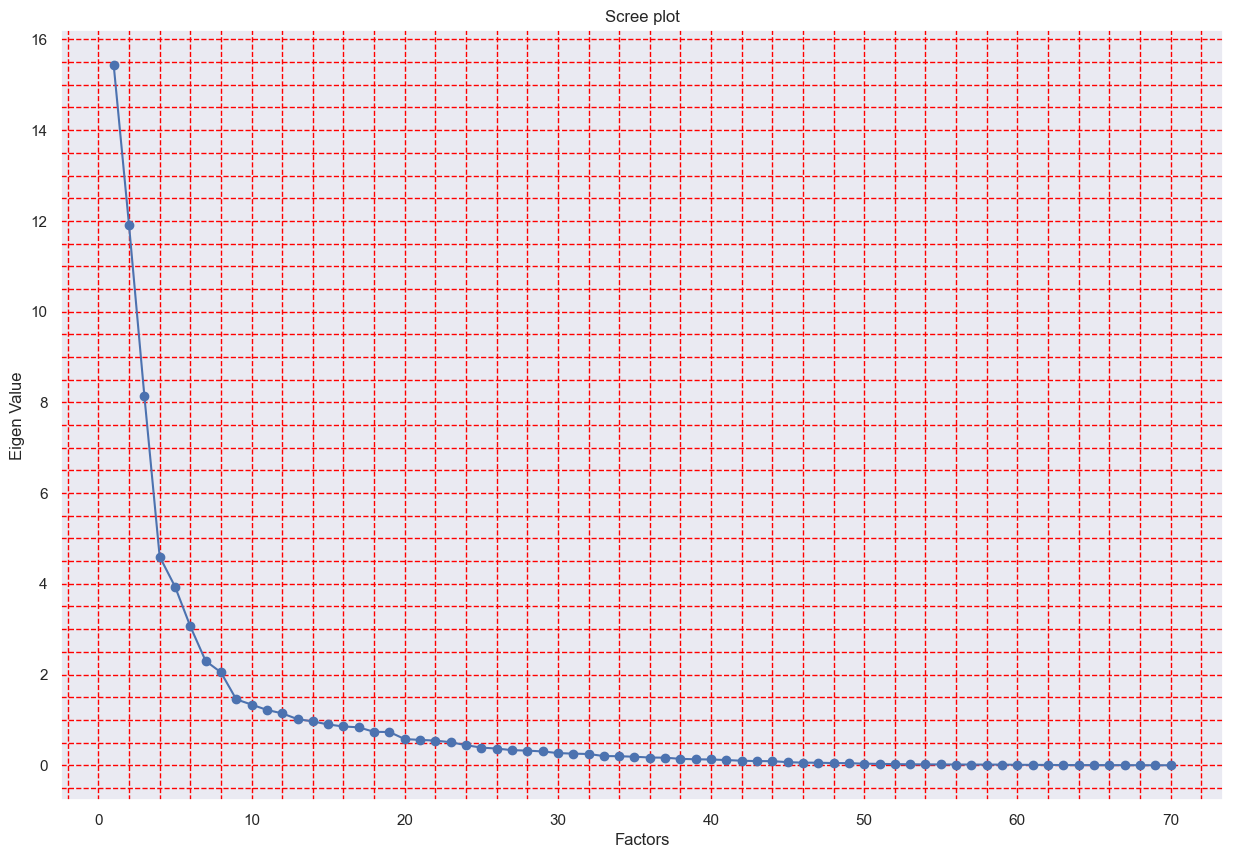

In [157]:
sns.set()
plt.figure(figsize=(15,10))
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(which='both', color='red', linestyle='--')
plt.minorticks_on()
plt.show()

In [146]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = fa_train_df.columns
Factors

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,...,Factor 15,Factor 16,Factor 17,Factor 18,Factor 19,Factor 20,Factor 21,Factor 22,Factor 23,Factor 24
UID,-0.092103,-0.011030,-0.210763,-0.149895,0.120953,-0.111742,0.736531,0.520359,0.024118,0.109680,...,-0.020171,0.012623,-0.031257,-0.002964,0.025847,0.013951,-0.010923,0.010812,0.006388,-0.004847
COUNTYID,-0.113458,0.026218,-0.072140,-0.064060,0.033995,-0.085084,0.156546,0.122182,-0.000864,0.055416,...,0.004202,0.035661,0.048469,0.004823,0.046027,0.023322,-0.119841,0.137260,0.236170,-0.056968
STATEID,-0.121248,-0.011458,-0.224158,-0.136705,0.120038,-0.115710,0.737522,0.530702,0.023306,0.115512,...,-0.017557,0.011831,-0.058982,-0.002453,0.002287,-0.006526,0.037044,-0.030044,-0.057228,0.012143
zip_code,-0.031228,0.088412,0.064913,-0.080168,-0.053832,-0.063822,-0.260996,-0.187984,0.006367,-0.031545,...,-0.010054,-0.025473,-0.004983,-0.014503,0.094247,0.096900,-0.006342,0.083342,0.109007,-0.003872
area_code,0.019818,0.017496,0.014450,0.021428,0.006134,-0.070179,-0.000360,0.067031,0.020410,0.041569,...,0.013668,-0.068480,-0.060039,-0.003961,0.019636,0.046343,-0.043009,0.059565,0.104206,-0.056768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
married,0.543636,-0.027505,-0.492351,0.142570,-0.130522,-0.100891,-0.085828,0.131825,0.211393,-0.079335,...,0.277712,-0.403066,0.054795,-0.000862,-0.000334,0.033719,-0.058967,0.020814,-0.004192,0.009409
married_snp,-0.344002,0.043335,0.268386,0.002402,0.149394,0.031834,-0.280761,0.304859,0.110280,0.366670,...,0.005897,-0.030158,-0.007679,-0.000344,-0.022448,0.017959,-0.000942,-0.016264,-0.015540,0.002414
separated,-0.353802,0.018721,0.143030,0.026784,0.076033,0.087180,-0.154633,0.264350,0.148961,0.317743,...,0.035204,0.026994,0.008925,0.007323,0.011078,-0.035673,0.041175,0.000197,0.016143,-0.019753
divorced,-0.371174,-0.041401,-0.207403,0.034626,-0.053356,0.316727,0.023640,-0.112587,0.035169,0.063539,...,-0.148787,0.245091,0.047015,0.013463,0.226606,0.135265,-0.000890,0.055856,0.006235,0.021368


In [147]:
fa = FactorAnalyzer( rotation="varimax", n_factors = 12)
fa.fit(fa_train_df)
loadings = fa.loadings_

In [148]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = fa_train_df.columns
Factors

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11
UID,-0.072015,-0.006145,-0.012054,-0.072872,-0.019427,0.034992,-0.051662,0.966578,-0.019158,-0.029926,0.028803,0.063852
COUNTYID,-0.095448,0.012854,-0.012756,-0.020947,-0.039930,-0.030641,-0.017996,0.241360,-0.017364,-0.018245,-0.004953,-0.099123
STATEID,-0.098685,-0.007035,-0.020578,-0.066400,-0.011315,0.019704,-0.066100,0.949980,-0.034706,-0.024339,0.028414,0.077468
zip_code,-0.039947,0.059005,0.012885,-0.040338,-0.113319,-0.028488,0.079794,-0.253326,0.044343,-0.010742,0.000343,-0.289410
area_code,0.040847,0.030564,-0.047591,0.002687,-0.021287,-0.061334,-0.000489,0.049357,-0.001252,0.043240,-0.005955,-0.017768
...,...,...,...,...,...,...,...,...,...,...,...,...
married,0.294789,0.230821,-0.429754,-0.228574,0.297210,0.157992,0.043306,0.033090,0.066265,-0.045680,0.328821,-0.040822
married_snp,-0.104450,-0.074573,0.201380,0.099080,0.004065,-0.568346,-0.009088,0.016722,0.091247,-0.003836,-0.132710,-0.075732
separated,-0.189262,-0.083698,0.166653,0.089750,0.063099,-0.425847,-0.010042,0.068549,0.095010,0.006774,-0.053597,-0.045209
divorced,-0.423171,-0.114859,0.162707,0.000607,0.266399,0.023049,-0.005097,-0.016148,-0.012526,-0.012186,0.053241,-0.050295


In [150]:
#  • Highschool graduation rates
#                         • Median population age
#                         • Second mortgage statistics
#                         • Percent own
#                         • Bad debt expense

Factors_df = round(Factors.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", "female_age_median", "home_equity_second_mortgage", 'second_mortgage', 'second_mortgage_cdf', 'pct_own', 'bad_debt'], :], 2)

In [151]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.6:
    color = 'red'
  elif value > 0.6:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [152]:
Factors_df.style.applymap(color_negative_red)

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11
hs_degree,0.360000,0.030000,-0.030000,-0.160000,0.220000,0.840000,0.080000,0.050000,0.140000,-0.030000,-0.070000,0.010000
hs_degree_male,0.370000,0.030000,-0.010000,-0.150000,0.200000,0.780000,0.080000,0.040000,0.150000,-0.030000,-0.060000,0.010000
hs_degree_female,0.320000,0.030000,-0.060000,-0.160000,0.240000,0.770000,0.070000,0.050000,0.130000,-0.040000,-0.080000,0.020000
male_age_median,0.170000,-0.060000,-0.220000,-0.100000,0.850000,0.110000,-0.030000,-0.020000,-0.060000,-0.050000,0.100000,0.020000
female_age_median,0.120000,-0.070000,-0.190000,-0.060000,0.860000,0.100000,-0.040000,-0.020000,-0.070000,-0.020000,0.180000,0.050000
home_equity_second_mortgage,0.030000,0.030000,0.050000,0.010000,-0.080000,-0.010000,0.920000,-0.020000,0.040000,0.030000,-0.040000,0.010000
second_mortgage,0.060000,0.020000,0.050000,0.020000,-0.080000,-0.020000,0.970000,-0.030000,0.030000,0.040000,-0.040000,-0.010000
second_mortgage_cdf,-0.100000,-0.120000,0.090000,0.020000,-0.000000,-0.120000,-0.720000,0.060000,-0.160000,-0.030000,-0.060000,-0.060000
pct_own,0.150000,0.200000,-0.710000,-0.150000,0.340000,0.270000,0.020000,0.060000,0.020000,-0.060000,0.240000,0.030000
bad_debt,0.390000,0.030000,-0.030000,-0.030000,-0.010000,0.150000,0.550000,-0.140000,0.250000,0.040000,-0.010000,0.590000


In [153]:
len(fa_train_df.columns)

70

In [154]:
# Get variance of each factors
fact_variance  = fa.get_factor_variance()
fact_variance

(array([12.04837062, 11.46660586,  5.08244557,  4.77329727,  4.45686143,
         3.47049185,  3.43315516,  2.18853817,  2.16103885,  1.80888716,
         1.80139408,  1.36225102]),
 array([0.17211958, 0.16380866, 0.07260637, 0.06818996, 0.06366945,
        0.04957846, 0.04904507, 0.03126483, 0.03087198, 0.02584125,
        0.0257342 , 0.01946073]),
 array([0.17211958, 0.33592824, 0.4085346 , 0.47672456, 0.54039401,
        0.58997247, 0.63901754, 0.67028237, 0.70115435, 0.7269956 ,
        0.7527298 , 0.77219053]))

In [155]:
Factor_variance  = pd.DataFrame.from_records(fact_variance)

Factor_variance = Factor_variance.add_prefix('Factor ')

Factor_variance.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
round(Factor_variance, 2)

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11
SS Loadings,12.05,11.47,5.08,4.77,4.46,3.47,3.43,2.19,2.16,1.81,1.80,1.36
Proportion Var,0.17,0.16,0.07,0.07,0.06,0.05,0.05,0.03,0.03,0.03,0.03,0.02
Cumulative Var,0.17,0.34,0.41,0.48,0.54,0.59,0.64,0.67,0.70,0.73,0.75,0.77


# Project Task: Week 4
## Data Modeling :

Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.
a. Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step. b. Run another model at State level. There are 52 states in USA. c. Keep below considerations while building a linear regression model. Data Modeling :
Variables should have significant impact on predicting Monthly mortgage and owner costs
Utilize all predictor variable to start with initial hypothesis
R square of 60 percent and above should be achieved
Ensure Multi-collinearity does not exist in dependent variables
Test if predicted variable is normally distributed

In [76]:
train.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [77]:
train['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [78]:
type_dict={'type':{'City':1, 'Urban':2, 'Town':3, 'CDP':4, 'Village':5, 'Borough':6}}


In [79]:
train.replace(type_dict,inplace=True)
test.replace(type_dict,inplace=True)


In [80]:
train['type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [81]:
test['type'].unique()


array([4, 1, 6, 3, 5, 2], dtype=int64)

In [82]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
              'pct_own', 'married','separated', 'divorced']


In [83]:
X_train = train[feature_cols]
y_train = train['hc_mortgage_mean']
X_test = test[feature_cols]
y_test = test['hc_mortgage_mean']


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score


In [85]:
X_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
0,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,0.79046,0.57851,0.01240,0.08770
1,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,0.52483,0.34886,0.01426,0.09030
2,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,0.85331,0.64745,0.01607,0.10657
3,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,0.65037,0.47257,0.02021,0.10106
4,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,0.13046,0.12356,0.00000,0.03109


In [86]:
X_test.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
27321,163,26,48239,4,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299
27322,1,23,4210,1,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377
27323,15,42,14871,6,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,0.81897,0.59961,0.01358,0.10026
27324,231,21,42633,1,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,0.84609,0.56953,0.04694,0.12489
27325,355,48,78410,3,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,0.79077,0.57620,0.00588,0.16379


In [87]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

a. Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.


In [88]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [89]:
y_pred= lr.predict(X_test_scaled)

In [90]:
r2_score(y_test,y_pred)

0.7381882934134452

In [91]:
mean_absolute_error(y_test,y_pred)

233.86965694140085

In [92]:
mean_squared_error(y_test,y_pred)

103818.40486733473

In [93]:
np.sqrt(mean_squared_error(y_test,y_pred))

322.20863561880947

In [94]:
r2_score(y_train, lr.predict(X_train_scaled))

0.734344756627955

In [95]:
lr.coef_

array([ -28.50842455,  -21.7100607 ,  -22.98370175,  -57.43101333,
         -4.78426374,  558.7402445 ,   -0.55955638,   70.89657588,
         12.81271881, -113.18431746, -176.51983734,    8.10645154,
          5.24214879,  -55.79637445])

In [96]:
X_train.columns

Index(['COUNTYID', 'STATEID', 'zip_code', 'type', 'pop', 'family_mean',
       'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'pct_own',
       'married', 'separated', 'divorced'],
      dtype='object')

In [97]:
state = train['STATEID'].unique()
state

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [98]:
for i in [11,1,29]:
    print("State ID-",i)
    
    X_train_nation = train[train['COUNTYID'] == i][feature_cols]
    y_train_nation = train[train['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_test_nation = test[test['COUNTYID'] == i][feature_cols]
    y_test_nation = test[test['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_train_scaled_nation = sc.fit_transform(X_train_nation)
    X_test_scaled_nation = sc.fit_transform(X_test_nation)
    
    lr.fit(X_train_scaled_nation,y_train_nation)
    y_pred_nation = lr.predict(X_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 11
Overall R2 score of linear regression model for state, 11 :- 0.7458953509562304
Overall RMSE of linear regression model for state, 11 :- 238.5227678809512


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8086161640279984
Overall RMSE of linear regression model for state, 1 :- 311.532907203562


State ID- 29
Overall R2 score of linear regression model for state, 29 :- 0.7090032526359473
Overall RMSE of linear regression model for state, 29 :- 270.06841264277546




Testing whether predicted value is distributed normally or not

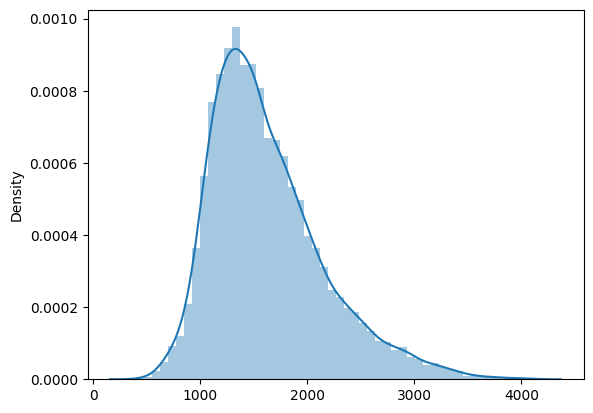

In [99]:
sns.distplot(y_pred)
plt.show()